In [ ]:
from google.colab import files
import pandas as pd
import io

# Read file by upload
upload_files = files.upload()
for filename in upload_files.keys():
  df = pd.read_csv(io.StringIO(upload_files[filename].decode('latin-1')), header=None)

# Read  file by google drive
# link = 'https://drive.google.com/open?id=1GziqiGQqYxx0beSgYysOHr45HODDjap0' # The shareable link
# fluff, id = link.split('=')
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('fix_cadar_asn_2019.csv')  
# df = pd.read_csv('fix_cadar_asn_2019.csv', engine='python')

df.head()
# Remove column
# df = df.drop(df.loc[:, '3':].columns, axis = 1) 

# Give column name
df.columns = ["Label", "Tweet"]

Saving contoh_seuprit.csv to contoh_seuprit (1).csv


In [ ]:
# Checking

# Print df
print(df.head().to_markdown())

# Check colums Type
print('Column Value have df type \t:', df['Label'].dtypes)
# print('Column Date have df type \t:', df['Date'].dtypes)
print('Column Tweet have df type \t:', df['Tweet'].dtypes)

# Check null
print('Column Value have null value \t:', df['Label'].isnull().values.any())
# print('Column Date have null value \t:', df['Date'].isnull().values.any())
print('Column Tweet have null value \t:', df['Tweet'].isnull().values.any())

# Check number of row
print('Column Value have row \t:', df['Label'].count())
# print('Column Date have row \t:', df['Date'].count())
print('Column Tweer have row \t:', df['Tweet'].count())

|    | Label    | Tweet                                                                                                                                                                                                                                                    |
|---:|:---------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | sentimen | frase                                                                                                                                                                                                                                                    |
|  1 | positif  | Enak aja ASN digaji pemerintah. Sumbernya duit pajak rakyat. Rakyat yang mayoritas beragama islam yang menganjurkan penggunaan cadar. Jadi aturan pemerintah tidak boleh sewena

In [ ]:
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Preprocessing Tweet column's

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# 1. Case Folding
# Make text to lower case
df['Tweet'] = df['Tweet'].apply(lambda x: x.lower())
# Delete link
for idx in df.index: 
  df['Tweet'][idx] = re.sub(r"http\S+", "", df['Tweet'][idx])
# Delete number
df['Tweet']= df['Tweet'].apply(lambda x:''.join([i for i in x if i not in string.digits]))
# Remove puntuation
df['Tweet'] = df['Tweet'].str.replace('[^\w\s]',' ')
# Delete whitespace
df['Tweet'] = df['Tweet'].apply(lambda x: x.strip())

print(df['Tweet'].head().to_markdown())

|    | Tweet                                                                                                                                                                                                                                                   |
|---:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | frase                                                                                                                                                                                                                                                   |
|  1 | enak aja asn digaji pemerintah  sumbernya duit pajak rakyat  rakyat yang mayoritas beragama islam yang menganjurkan penggunaan cadar  jadi aturan pemerintah tidak boleh sewenang  menjalankan anjuran agama itu hak setiap or

In [ ]:
!pip install Sastrawi 
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

     |████████████████████████████████| 215kB 2.7MB/s 


In [ ]:
stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['di', 'kan', 'hmm','yg', 'dg'] # To add more stopword
data = stop_factory + more_stopword
dictionary = ArrayDictionary(data)
stopwords = StopWordRemover(dictionary)

print(data)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
# 2. Filtering
for idx in df.index: 
  df['Tweet'][idx] = stopwords.remove(df['Tweet'][idx])
  
print(df['Tweet'].head().to_markdown())

|    | Tweet                                                                                                                                                                                                                                                                                                    |
|---:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | sebaiknya tugas utama menteri agama  hari kerja      bersihkan asn kemenag korupsi   bersihkan indonesia komunis  syiah yahudi   jangnlah kau urusi usik cadar  hijab  celana cingkrang  tata cara berdoa bahasa indonesia                                                                               |
|  1 | setahu dilarang memakai celana cingkrang cadar asn  standardnya  kalau mau 

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# 3. Stemming
for idx in df.index: 
  df['Tweet'][idx] = stemmer.stem(df['Tweet'][idx])
  
print(df['Tweet'].head().to_markdown())

|    | Tweet                                                                                                                                                                                                                                                                       |
|---:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | baik tugas utama menteri agama hari kerja sih asn kemenag korupsi sih indonesia komunis syiah yahudi jangnlah kau urus usik cadar hijab celana cingkrang tata cara doa bahasa indonesia                                                                                     |
|  1 | tahu larang pakai celana cingkrang cadar asn standardnya kalau mau larang silah keluar asn gitu aja kok repot sih atur taat dong gimana sih orang                 

In [ ]:
# 4. Tokenizing
tokens = df['Tweet'].apply(word_tokenize)

print(tokens.head().to_markdown())

|    | Tweet                                                                                                                                                                                                                                                                                                                                                                                             |
|---:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | ['baik', 'tugas', 'utama', 'menteri', 'agama', 'hari', 'kerja', 'sih', 'asn', 'kemenag', 'korupsi', 'sih', 'indonesia', 'komunis', 'syiah', 'yahudi', 'jangnlah', 'kau', 'urus', 'usik', 'cadar', 'hijab', 

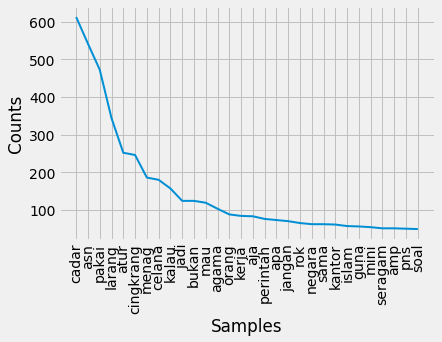

In [ ]:
import matplotlib.pyplot as plt
# Display most frequent word

all_words = [val for sublist in tokens for val in sublist]
freq = FreqDist(all_words)
freq.plot(30,cumulative=False)
plt.style.use('fivethirtyeight')
plt.show()

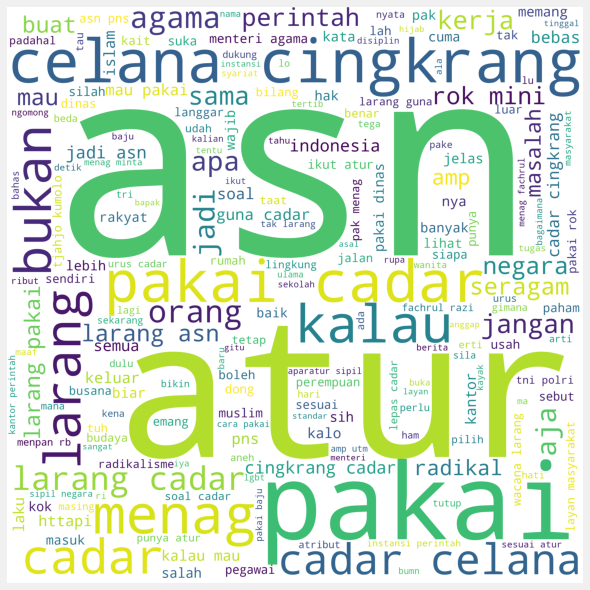

In [ ]:
from wordcloud import WordCloud

# Display cloudword
comment_words = ' '
for words in all_words: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 2500, height = 2500, 
                background_color ='white',   
                min_font_size = 1).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# TO DO : Implement naive bayes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Label'], random_state=1, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)


In [ ]:
word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

print(top_words_df)

              0
cadar       500
asn         430
pakai       369
larang      272
atur        201
...         ...
kibar         1
kian          1
kiai          1
khilafiyah    1
zulkifli      1

[1888 rows x 1 columns]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ', accuracy_score(y_test, predictions))

Accuracy score:  0.8468468468468469


In [ ]:
from sklearn.metrics import classification_report
print('Accuracy score: ', classification_report(y_test, predictions))

NameError: ignored

Text(84.34, 0.5, 'predicted label')

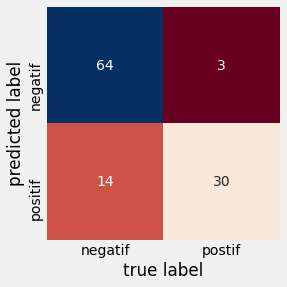

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, xticklabels=['negatif','postif'], yticklabels=['negatif',  'positif'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
testing_predictions = []
for i in range(len(X_test)):
  if predictions[i] == 0:
      testing_predictions.append('negatif')
  else:
      testing_predictions.append('positif')

check_df = pd.DataFrame({'actual_label': list(y_test), 'prediction': testing_predictions, 'Tweet':list(X_test)})
check_df.replace(to_replace=0, value='negatif', inplace=True)
check_df.replace(to_replace=1, value='positif', inplace=True)

print(check_df.to_markdown())

|     | actual_label   | prediction   | Tweet                                                                                                                                                                                                                                                                                                                                                                                                               |
|----:|:---------------|:-------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|   0 | negatif        | positif      | jaka sembung naik ojek nyambung jek emang orang cadar sama cingkrang

In [ ]:
test_tweet = [['Cadar merupakan warisan agama islam yang perlu menyapu']]
test_df = pd.DataFrame(test_tweet, columns = ['Test_Tweet']) 
# Make text to lower case
test_df['Test_Tweet'] = test_df['Test_Tweet'].apply(lambda x: x.lower())
# Delete link
for idx in test_df.index: 
  test_df['Test_Tweet'][idx] = re.sub(r"http\S+", "", test_df['Test_Tweet'][idx])
# Delete number
test_df['Test_Tweet']= test_df['Test_Tweet'].apply(lambda x:''.join([i for i in x if i not in string.digits]))
# Remove puntuation
test_df['Test_Tweet'] = test_df['Test_Tweet'].str.replace('[^\w\s]',' ')
# Delete whitespace
test_df['Test_Tweet'] = test_df['Test_Tweet'].apply(lambda x: x.strip())

for idx in test_df.index: 
  test_df['Test_Tweet'][idx] = stopwords.remove(test_df['Test_Tweet'][idx])

# 3. Stemming
for idx in test_df.index: 
  test_df['Test_Tweet'][idx] = stemmer.stem(test_df['Test_Tweet'][idx])

test_tweet_cv = cv.transform(test_df['Test_Tweet'])
predict_test_tweet = naive_bayes.predict(test_tweet_cv)
testing_test_predictions = []
for i in range(len(test_df['Test_Tweet'])):
  if predict_test_tweet[i] == 0:
      testing_test_predictions.append('negatif')
  else:
      testing_test_predictions.append('positif')

check_test_df = pd.DataFrame({'prediction': testing_test_predictions, 'Tweet':list(test_df['Test_Tweet'])})

print(check_test_df.to_markdown())

|    | prediction   | Tweet                                   |
|---:|:-------------|:----------------------------------------|
|  0 | positif      | cadar rupa waris agama islam perlu sapu |
